# Solution: Modelling a leaky vaccine

### Assuming $\beta$ equals 0.25 days$^{-1}$ and $\gamma$ equals 0.1 days$^{-1}$, what proportion of the population would have to be vaccinated with a perfectly effective vaccine to prevent an epidemic?

Using the formula for the herd immunity threshold, we need a vaccine coverage of 60% with a perfect vaccine:

\begin{align}
p_c & = 1- \frac{1}{R_{0}} \\
    & = 1- \frac{\gamma}{\beta} \\
    & = 1 - \frac{0.1}{0.25} \\
    & = 0.6
\end{align}

### Given the parameter assumptions above, what proportion of the population would have to be vaccinated with an all-or-nothing vaccine with 70% efficacy to prevent an epidemic?

Under the assumption of an all-or-nothing vaccine, we can simply multiply the vaccine efficacy *v<sub>eff</sub>* and the vaccine coverage to calculate the effective coverage *p<sub>eff</sub>*:

\begin{align}
v_{eff} * p_{eff} & = 0.6 \\
p_{eff} = \frac{0.6}{0.7} \\
p_{eff} = 0.86
\end{align}

Therefore, we need at least 86% coverage of a leaky vaccine with efficacy of 70%, to interrupt transmission (R<sub>0</sub> < 1).

### Leaky vaccine: 

<img src="../Graphics_and_Data/m1_nb3_diagram.png"> 

### Based on the diagram, write down the differential equations for this model on paper. What is the value of *c<sub>s</sub>* for a leaky vaccine with 70% efficacy?

\begin{align}
\frac{dS}{dt} & = -\beta \frac{I}{N} S \\
\frac{dI}{dt} & = \beta \frac{I}{N} S + c_{s} \beta \frac{I}{N} V - \gamma I \\
\frac{dR}{dt} & = \gamma I \\
\frac{dV}{dt} & = -c_{s} \beta \frac{I}{N} V
\end{align}

For a leaky vaccine with 70% efficacy, the value of c<sub>s</sub> would be 0.3, reflecting the degree to which susceptibility is reduced.

**Modelling a leaky vaccine with 60% coverage**:

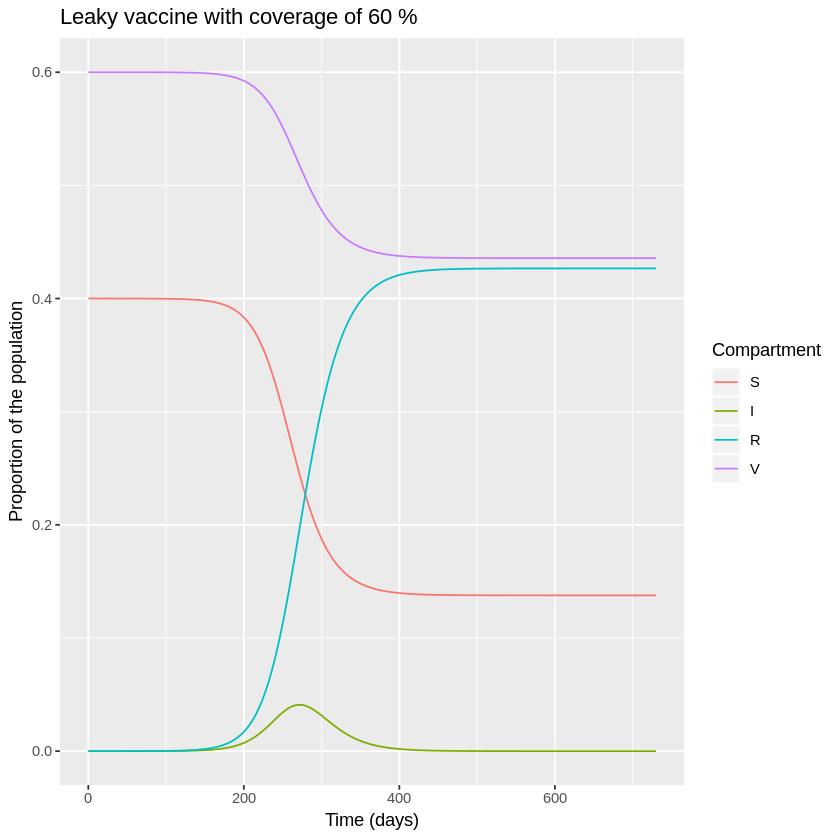

In [1]:
# LOAD THE PACKAGES:
library(deSolve)
library(reshape2)
library(ggplot2)

# MODEL INPUTS:

# Specify the total population size
N <- 1000000

# Specify the vaccination coverage
p <- 0.6

# Initial number of people in each compartment
initial_state_values <- c(S = (1-p)*N,    # the unvaccinated proportion of
                                          # the population is susceptible
                          I = 1,          # the epidemic starts with a
                                          # single infected person
                          R = 0,          # there is no prior immunity
                          V = p*N)        # a proportion p of the population
                                          # is vaccinated (vaccination coverage) 

# Parameters
parameters <- c(beta = 0.25,      # the infection rate in units of days^-1
                gamma = 0.1,      # the rate of recovery in units of days^-1
                c_s = 0.3)        # the reduction in the force of infection
                                  # acting on those vaccinated
                                  # note that c_s is a multiplicative term
                                  # and not a rate

# TIMESTEPS:

# Sequence of timesteps to solve the model at
times <- seq(from = 0, to = 730, by = 1)  # from 0 to 2 years, daily intervals

# MODEL FUNCTION: 

vaccine_model <- function(time, state, parameters) {  

    with(as.list(c(state, parameters)), {    
        
    # Defining lambda as a function of beta and I:
      lambda <- beta * I/N
        
    # The differential equations
      dS <- -lambda * S            
      dI <- lambda * S - gamma * I + c_s * lambda * V  # vaccinated people (V) can
                                                       # now also move into the I compartment
      dR <- gamma * I
      dV <- - c_s * lambda * V                         # vaccinated people become infected
                                                       # at a rate c_s * lambda                   
      
    # Return the number of people in each compartment at each timestep 
    # (in the same order as the input state variables)
    return(list(c(dS, dI, dR, dV))) 
    })
  
}

# MODEL OUTPUT:

# Solving the differential equations using the ode integration algorithm
output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = vaccine_model,
                            parms = parameters))

# PLOT THE OUTPUT

# turn output dataset into long format
output_long <- melt(as.data.frame(output), id = "time")

# Adding a column for the prevalence proportion to the long-format output
output_long$prevalence <- output_long$value/sum(initial_state_values)

# Plot the number in each compartment over time
ggplot(data = output_long,                                               
       aes(x = time, y = prevalence, colour = variable, group = variable)) +  
  geom_line() +                                                          
  xlab("Time (days)")+                                                   
  ylab("Proportion of the population") +
  labs(title = paste("Leaky vaccine with coverage of", p*100, "%"), 
       colour = "Compartment") +
  scale_colour_brewer(palette = "Set2")

As you can see, a 60% coverage is not sufficient to prevent an epidemic if the vaccine is not perfectly effective. 

**Modelling a leaky vaccine with 86% coverage:**

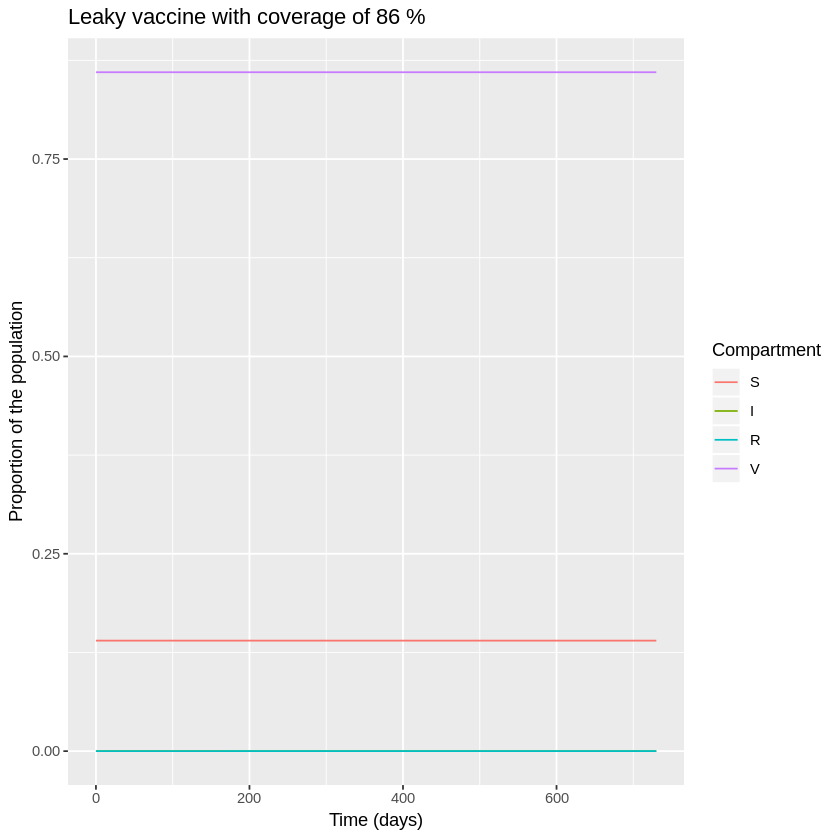

In [2]:
# Specify the vaccination coverage
p <- 0.86

# Initial number of people in each compartment
initial_state_values <- c(S = (1-p)*N,      # the unvaccinated proportion of
                                            # the population is susceptible
                          I = 1,            # the epidemic starts with a single
                                            # infected person
                          R = 0,            # there is no prior immunity in
                                            # the population
                          V = p*N)          # a proportion p of the population
                                            # is vaccinated (vaccination coverage) 

# MODEL OUTPUT:

# Solving the differential equations using the ode integration algorithm
output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = vaccine_model,
                            parms = parameters))

# PLOT THE OUTPUT

# turn output dataset into long format
output_long <- melt(as.data.frame(output), id = "time")      

# Adding a column for the prevalence proportion to the long-format output
output_long$prevalence <- output_long$value/sum(initial_state_values)

# Plot the number in each compartment over time
ggplot(data = output_long,                                               
       aes(x = time, y = prevalence, colour = variable, group = variable)) +  
  geom_line() +                                                          
  xlab("Time (days)")+                                                   
  ylab("Proportion of the population") +
  labs(title = paste("Leaky vaccine with coverage of", p*100, "%"), 
       colour = "Compartment")  +
  scale_colour_brewer(palette = "Set2")

### With a leaky vaccine with 70% efficacy, what proportion of the population would have to be vaccinated to prevent an epidemic (R<sub>eff</sub> < 1)? Try addressing this first through simulation.

Instead, the simulations above suggest that we need a coverage of at least 86% with a leaky vaccine with 70% efficacy to interrupt transmission and prevent an epidemic.

### Now, can you confirm this result using equations, and not simulation? For this, think about the relationship between R<sub>0</sub> and R<sub>eff</sub>.  

We can calculate the critical vaccination coverage needed to interrupt transmission (R<sub>eff</sub> < 1), in the following way.

Remember that in a simple homogenous model, R<sub>eff</sub> is proportional to the number of susceptible people in the population. In this case:

\begin{align}
R_{eff} & = (1-p) \times R_0 + p c_S \times R_0
\end{align}

where *p* is the proportion of the population receiving the vaccine, and c<sub>s</sub> is the reduction in susceptibility owing to the vaccine.

Setting p = p<sub>c</sub> when R<sub>eff</sub> = 1, and solving this to find *p<sub>c</sub>* gives:

\begin{align}
p_c & = \frac{1-\frac{1}{R_0}}{1-c_s} \\
p_c & = \frac{1-\frac{1}{\frac{0.25}{0.1}}}{1-0.3} \\
p_c & = 0.86
\end{align}